In [10]:
#나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [9]:
# 데이터 준비
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=UserWarning)
plt.rc('font', family='NanumBarunGothic')

df=pd.read_csv("Korail.csv", encoding='cp949')

# 데이터 보기
print(df.head())
print(df.info())

           기준일     구간 출발역  도착역  운임(금~일, 공휴일)  특실요금(금~일, 공휴일)  운임(월~목요일)  \
0  ~2014.12.31  대구~진해  대구  동대구        4800.0          3600.0     4800.0   
1  ~2014.12.31  대구~진해  대구   경산        4800.0          3600.0     4800.0   
2  ~2014.12.31  대구~진해  대구   청도        4800.0          3600.0     4800.0   
3  ~2014.12.31  대구~진해  대구   밀양        5600.0          3600.0     5300.0   
4  ~2014.12.31  대구~진해  대구   진영        8000.0          3600.0     7600.0   

   특실요금(월~목요일)  운임(전 요일)  특실요금(전 요일)  
0       3600.0       NaN         NaN  
1       3600.0       NaN         NaN  
2       3600.0       NaN         NaN  
3       3600.0       NaN         NaN  
4       3600.0       NaN         NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4484 entries, 0 to 4483
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   기준일             4484 non-null   object 
 1   구간              4484 non-null   object 
 2   출발역             4484 no

기준일               4484
구간                   0
출발역                  0
도착역                  0
운임(금~일, 공휴일)      2242
특실요금(금~일, 공휴일)    2242
운임(월~목요일)         2242
특실요금(월~목요일)       2242
운임(전 요일)          2242
특실요금(전 요일)        2242
dtype: int64
       운임(금~일, 공휴일)  특실요금(금~일, 공휴일)     운임(월~목요일)  특실요금(월~목요일)      운임(전 요일)  \
count   4484.000000     2242.000000   2242.000000  2242.000000   2242.000000   
mean   13404.081178     3822.881356  14188.893845  3783.764496  14808.162355   
std     7262.930661      591.504705   9578.377066   517.868588  10078.651443   
min     4800.000000     3600.000000   4800.000000  3600.000000   4800.000000   
25%    12000.000000     3600.000000   5300.000000  3600.000000   5600.000000   
50%    12000.000000     3600.000000  11500.000000  3600.000000  12000.000000   
75%    12000.000000     3600.000000  19900.000000  3600.000000  20800.000000   
max    53200.000000     8000.000000  50800.000000  7600.000000  53200.000000   

        특실요금(전 요일)  
count  2242.000

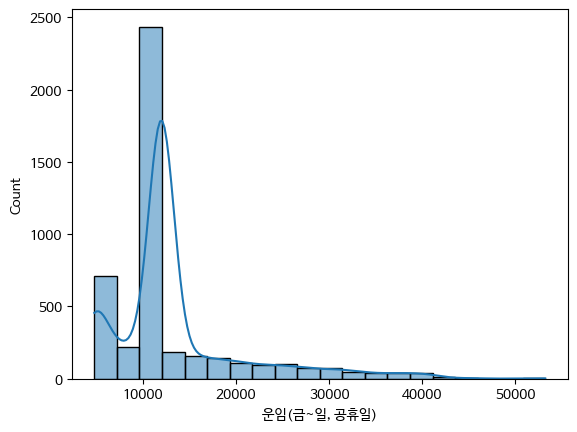

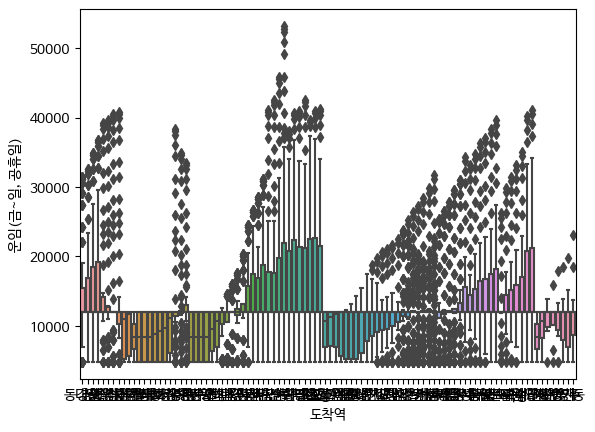

도착역
강경     12119.491525
경산     14880.555556
경주      9287.500000
계룡     12467.924528
곡성     15013.888889
           ...     
호계      8664.285714
홍성      9845.833333
화명     17121.428571
효자     17197.619048
희방사    10930.000000
Name: 운임(금~일, 공휴일), Length: 96, dtype: float64


In [10]:
# 데이터 클린징

# 형식 통일
df['기준일'] = pd.to_datetime(df['기준일'], errors='coerce')

# 결측치 확인
print(df.isnull().sum())
# 결측치를 중앙값으로 대체
median_value = df['운임(금~일, 공휴일)'].median()
df['운임(금~일, 공휴일)'].fillna(median_value, inplace=True)

# 기초 통계량 확인
print(df.describe())

# 데이터 시각화

# 히스토그램
sns.histplot(df['운임(금~일, 공휴일)'], bins=20, kde=True)
plt.show()

# 상자 수염 플롯
sns.boxplot(x='도착역', y='운임(금~일, 공휴일)', data=df)
plt.show()
# 도착역별 운임(금~일, 공휴일) 평균
average_fare_by_destination = df.groupby('도착역')['운임(금~일, 공휴일)'].mean()
print(average_fare_by_destination)

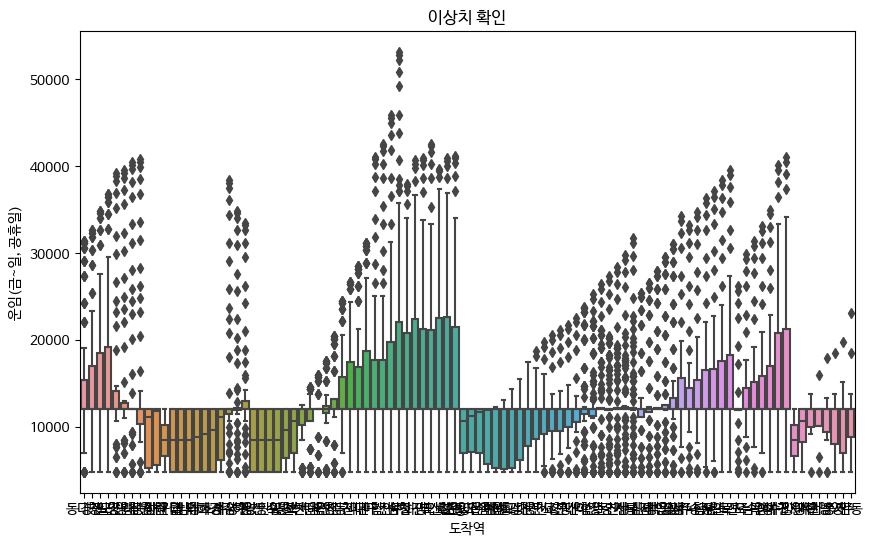

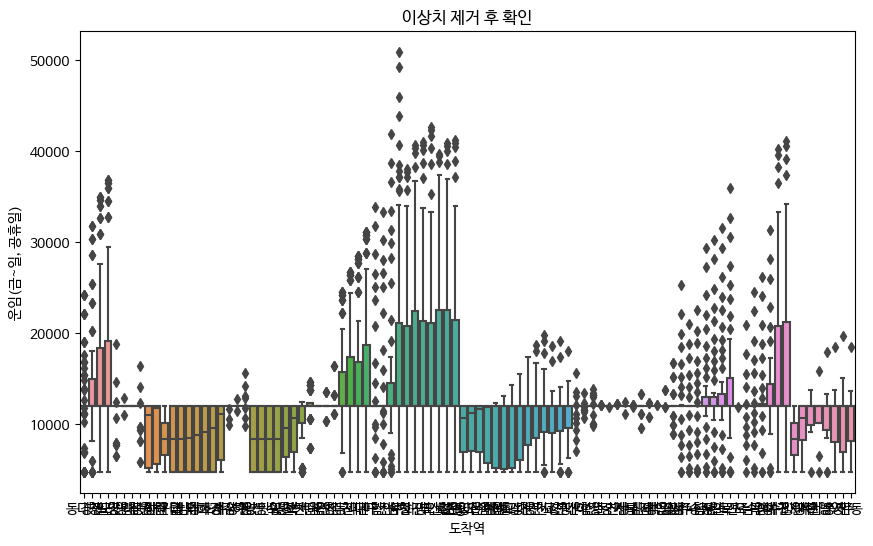

In [26]:
# 이상치 확인
plt.figure(figsize=(10, 6))
sns.boxplot(x='도착역', y='운임(금~일, 공휴일)', data=df)
plt.title("이상치 확인")
plt.show()

# 이상치 제거
def remove_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    series = series[(series >= lower_bound) & (series <= upper_bound)]
    return series

df_clean = df.copy()
df_clean['운임(금~일, 공휴일)'] = df_clean.groupby('도착역')['운임(금~일, 공휴일)'].transform(remove_outliers)
# 이상치 제거 후 확인
plt.figure(figsize=(10, 6))
sns.boxplot(x='도착역', y='운임(금~일, 공휴일)', data=df_clean)
plt.title("이상치 제거 후 확인")
plt.show()

<ipython-input-27-3921b5af8bb5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_clean.corr()


운임(금~일, 공휴일)      1.000000
특실요금(금~일, 공휴일)    0.788380
운임(월~목요일)         0.999962
특실요금(월~목요일)       0.763573
운임(전 요일)               NaN
특실요금(전 요일)             NaN
Name: 운임(금~일, 공휴일), dtype: float64


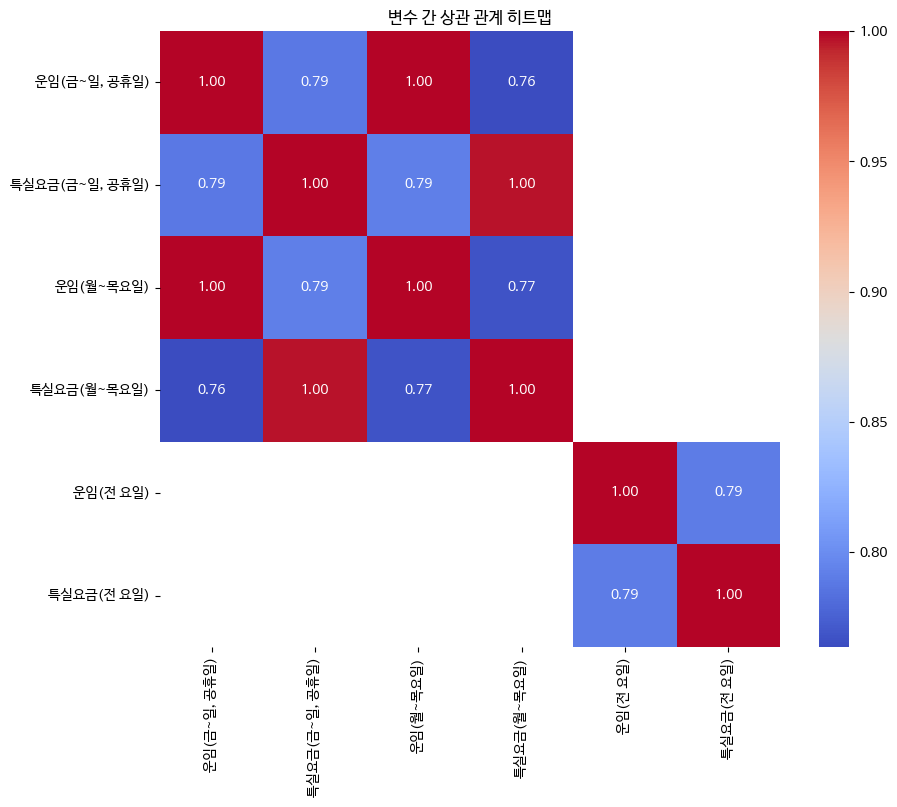

In [27]:
# '운임(금~일, 공휴일)'과 다른 변수 간의 상관 계수 계산
correlation_matrix = df_clean.corr()
correlation_with_fare = correlation_matrix['운임(금~일, 공휴일)']

# 상관 계수 출력
print(correlation_with_fare)
# 상관 관계를 히트맵으로 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('변수 간 상관 관계 히트맵')
plt.show()